In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibrationDisplay

#### Read and clean data


In [2]:
df = pd.read_csv('data.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
# Standardization: mean = 0, std = 1
scaler = StandardScaler()
df[['gre', 'gpa']] = scaler.fit_transform(df[['gre', 'gpa']])

# Dummy Encoding
df = pd.get_dummies(df, columns=['rank'], drop_first=True)

df.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,-1.834881,0.517867,False,True,False
1,1,0.361955,0.680604,False,True,False
2,1,1.460372,1.575660,False,False,False
3,1,0.205038,-0.621295,False,False,True
4,0,-0.736463,-1.326491,False,False,True


#### Logistic Regression


In [4]:
X = df[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y = df['admit']

In [5]:
# Train/Test split (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)  # yes or no
y_pred_prob = model.predict_proba(X_test)[:, 1]  # probabilities

y_pred, y_pred_prob

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1]),
 array([0.18417936, 0.37175166, 0.20536602, 0.29968866, 0.09760222,
        0.46072197, 0.3681014 , 0.29968866, 0.02138324, 0.67724053,
        0.29857756, 0.71831061, 0.10008835, 0.61675667, 0.53786731,
        0.29857756, 0.25066659, 0.45726734, 0.43650719, 0.60795487,
        0.37175166, 0.74385117, 0.72041476]))

#### Metrics


In [6]:
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
}

pd.DataFrame([metrics])

,accuracy,precision,recall,f1_score
0,0.521739,0.571429,0.333333,0.421053


In [7]:
confusion_matrix(y_test, y_pred)

array([[8, 3],
       [8, 4]])

#### ROC


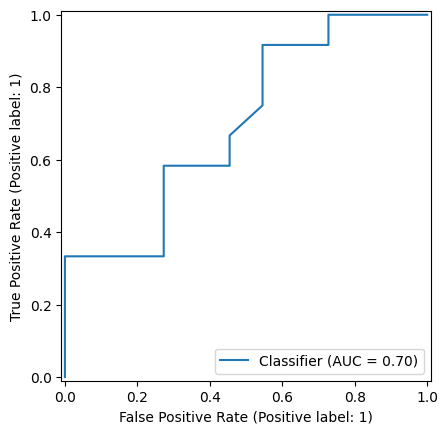

In [8]:
RocCurveDisplay.from_predictions(y_test, y_pred_prob)

#### Calibration plot


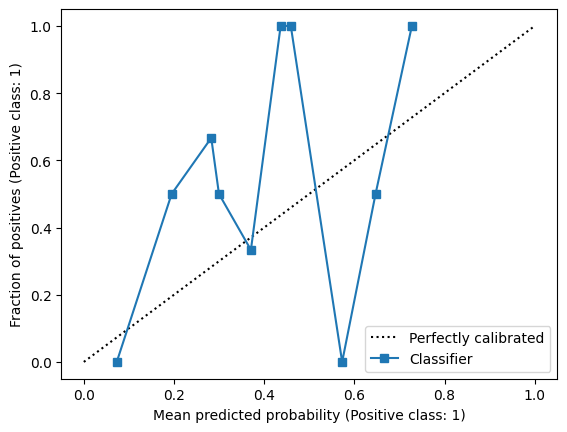

In [11]:
CalibrationDisplay.from_predictions(
    y_test, y_pred_prob, n_bins=10, strategy='quantile'
)